# Chronic kidney disease

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy.stats as stats
import statsmodels.api as sm
import requests
import time
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)


# Data Loadding 

In [120]:
import pandas as pd
url_string = 'https://raw.githubusercontent.com/Bishwaprotapi/Chronic-kidney-disease-using-ML/main/kidney_disease.csv'


In [121]:
df= pd.read_csv('https://raw.githubusercontent.com/Bishwaprotapi/Chronic-kidney-disease-using-ML/main/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [122]:
df.shape

(400, 26)

# Data Preprocessing for Chronic Kidney Disease
# ---
## The following steps are performed on the dataset in this section:
+ Dropping Redundant Columns
+ Checking For Duplicated Rows
+ Checking For Missing Values


In [123]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [124]:
df.tail(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
390,390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,25.0,0.8,135.0,3.7,15.0,52,6300,5.3,no,no,no,good,no,no,notckd
391,391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,85.0,16.0,1.1,142.0,4.1,15.6,44,5800,6.3,no,no,no,good,no,no,notckd
392,392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,133.0,48.0,1.2,147.0,4.3,14.8,46,6600,5.5,no,no,no,good,no,no,notckd
393,393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,117.0,45.0,0.7,141.0,4.4,13.0,54,7400,5.4,no,no,no,good,no,no,notckd
394,394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,137.0,46.0,0.8,139.0,5.0,14.1,45,9500,4.6,no,no,no,good,no,no,notckd
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [125]:
# dropping id column
df.drop('id', axis = 1, inplace = True)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [126]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [127]:
df.head(15)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [128]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [130]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [132]:
# Extracting categorical and numerical columns

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

In [133]:
# looking at unique values in categorical columns

for col in cat_cols:
    unique_values = df[col].unique()
    print(f"{col} has {unique_values} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [134]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = ['\tno','\tyes',' yes'], value=['no','yes','yes'], inplace=True)

df['coronary_artery_disease'].replace(to_replace = '\tno', value='no', inplace=True)

df['classification'].replace(to_replace = ['ckd\t', 'notckd'], value=['ckd', 'not ckd'], inplace=True)

In [135]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [136]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'classification']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

classification has [0 1] values



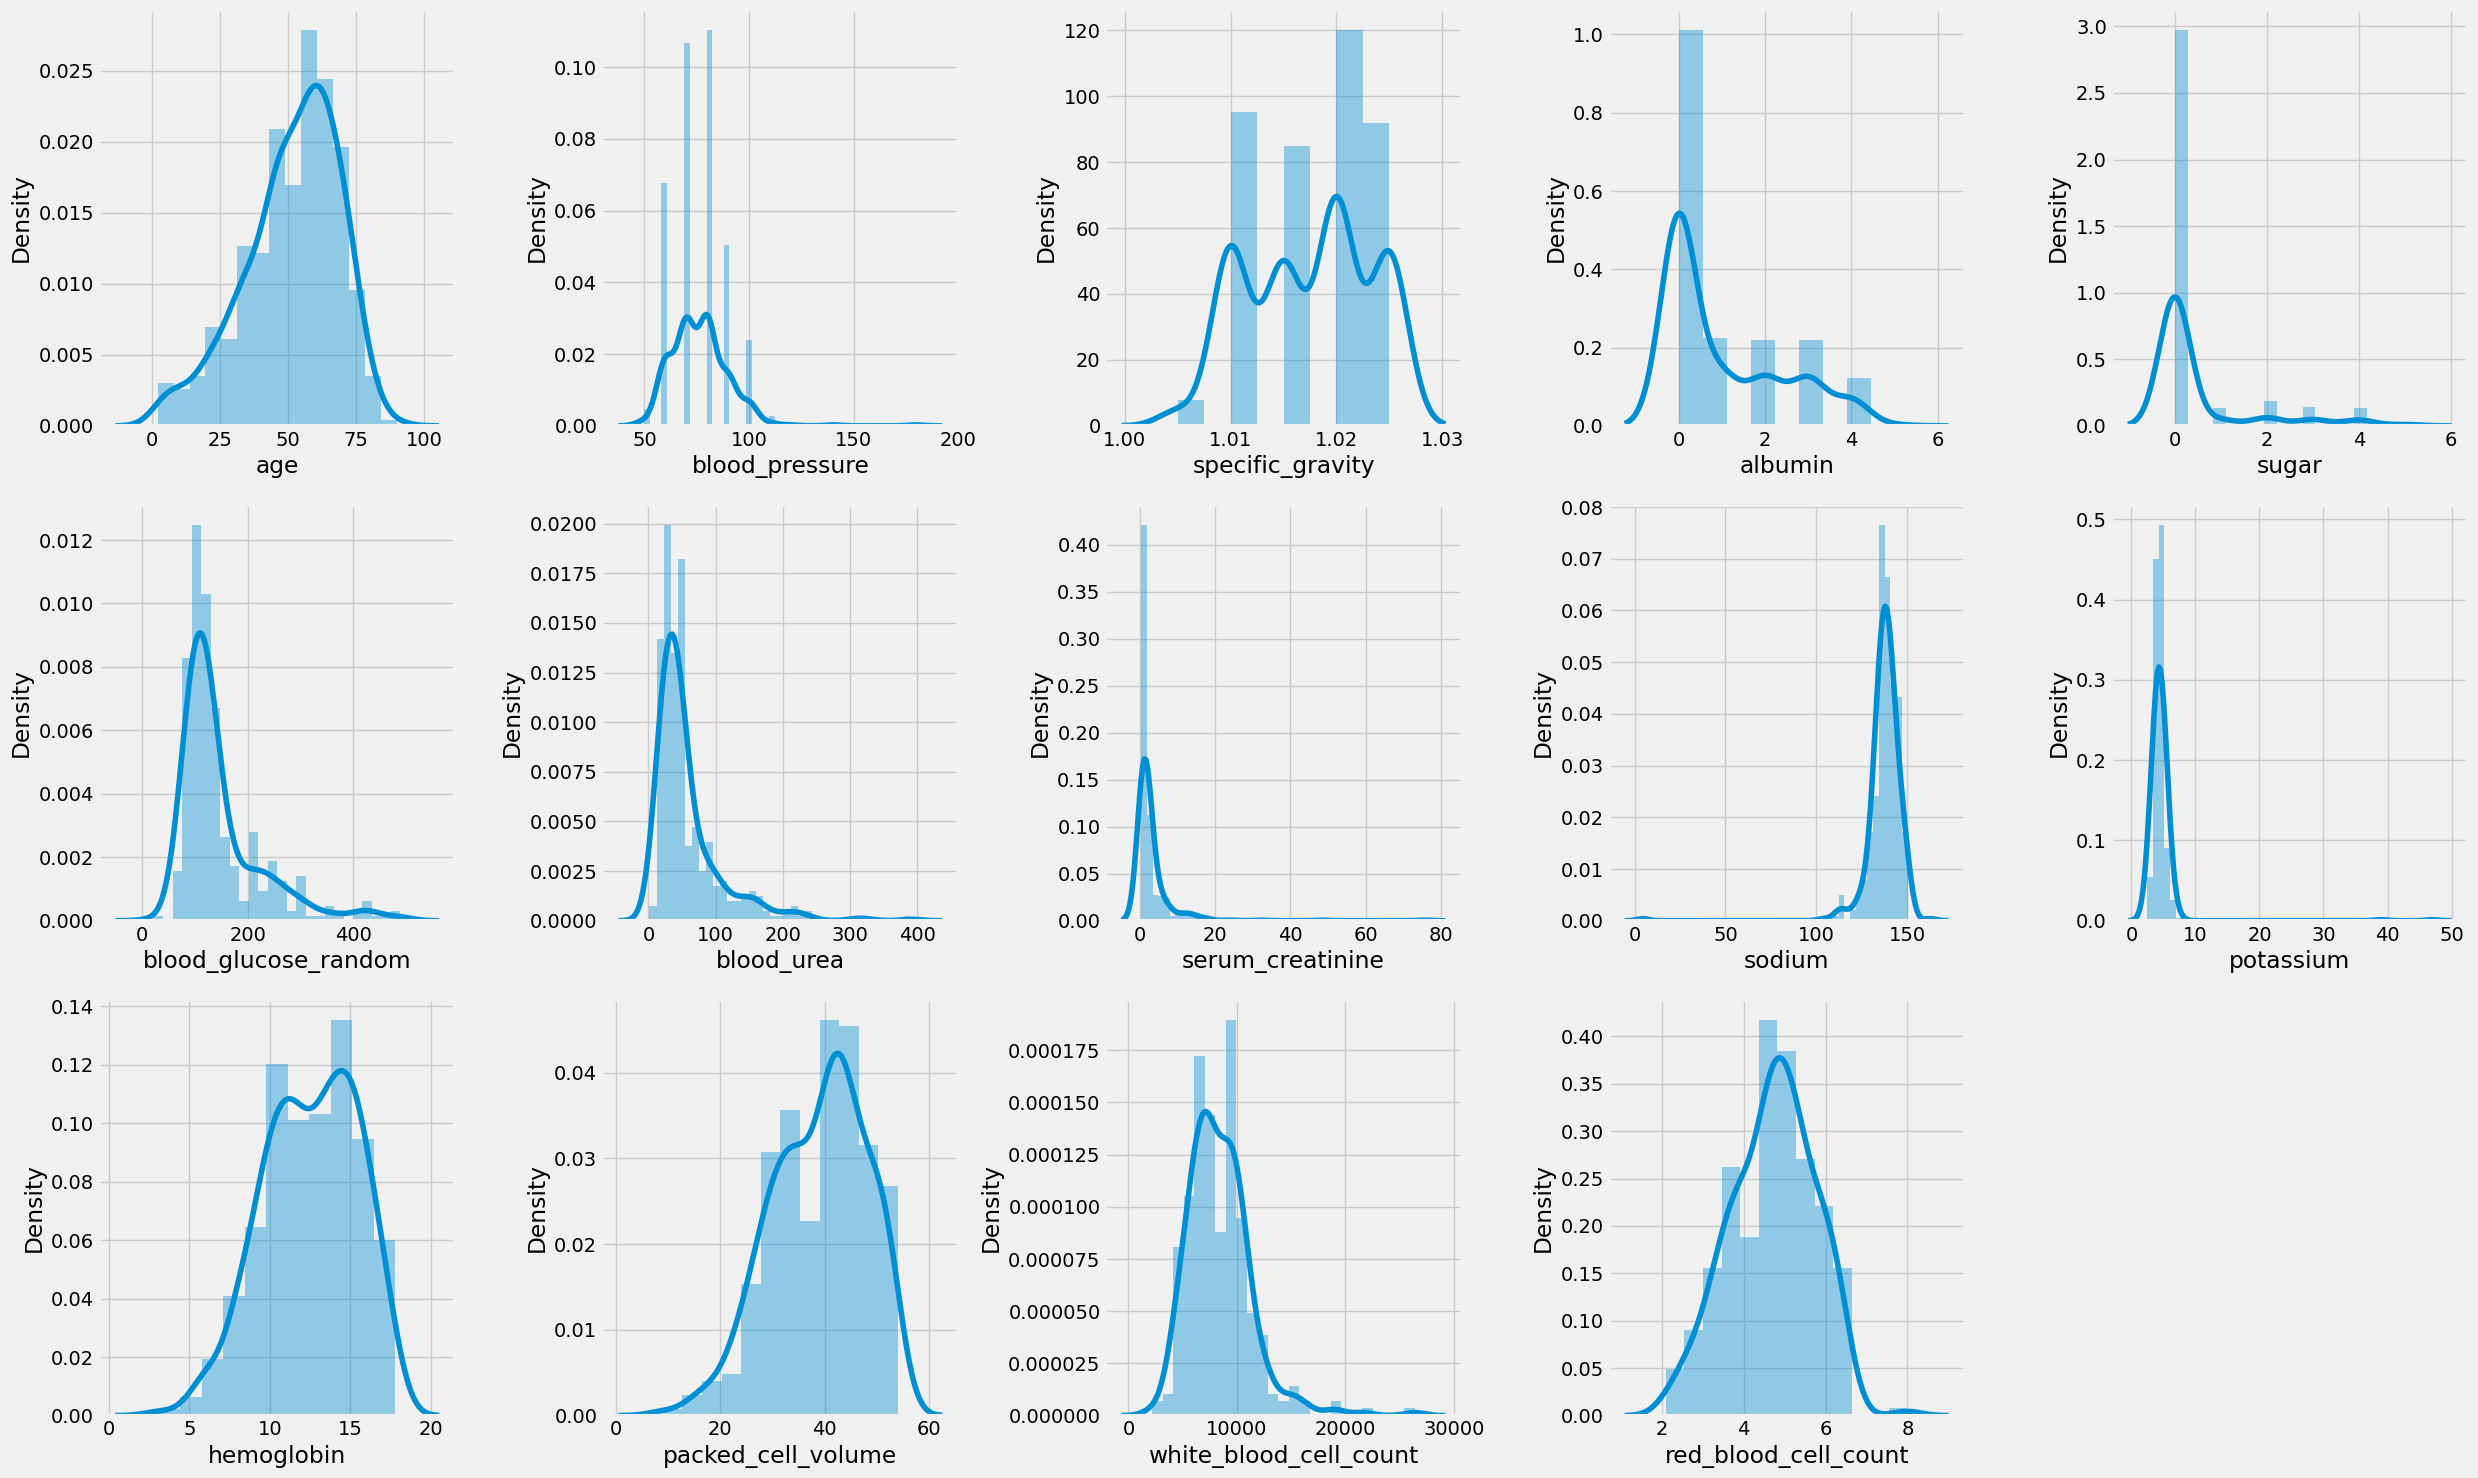

In [137]:
plt.figure(figsize = (25, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Skewness is observed in several columns, indicating a lack of symmetry in the distribution of data.
### This can affect the performance of some machine learning algorithms, which assume a normal distribution.
### It may be necessary to apply transformations to these columns to reduce skewness and improve model accuracy.

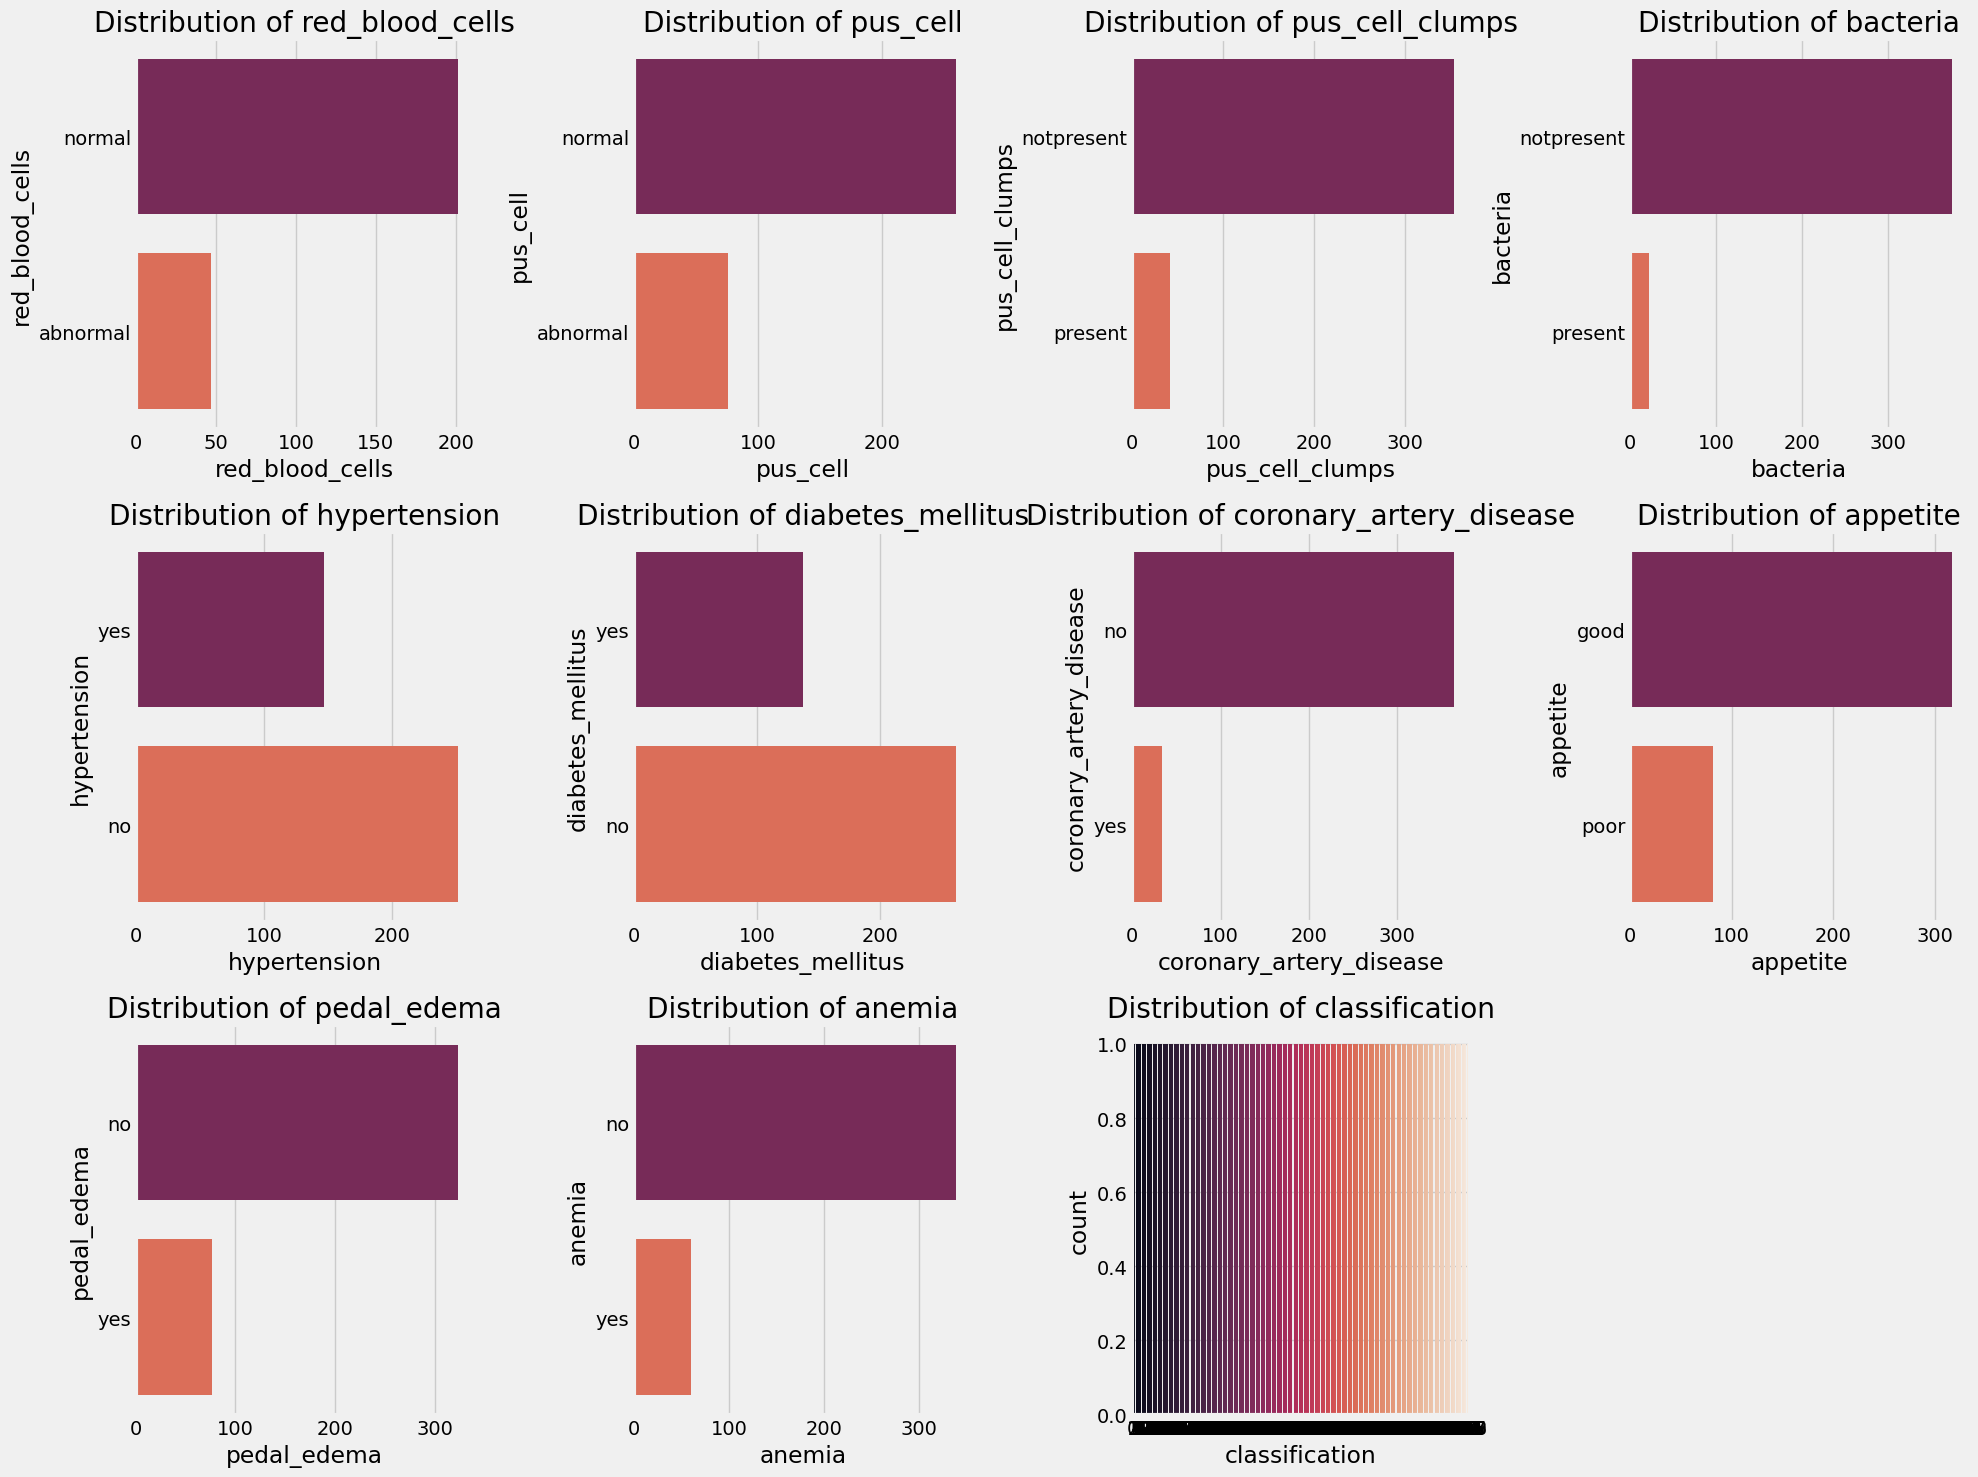

In [138]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        plt.title(f'Distribution of {column}')
        
    plotnumber += 1

plt.tight_layout()
plt.show()

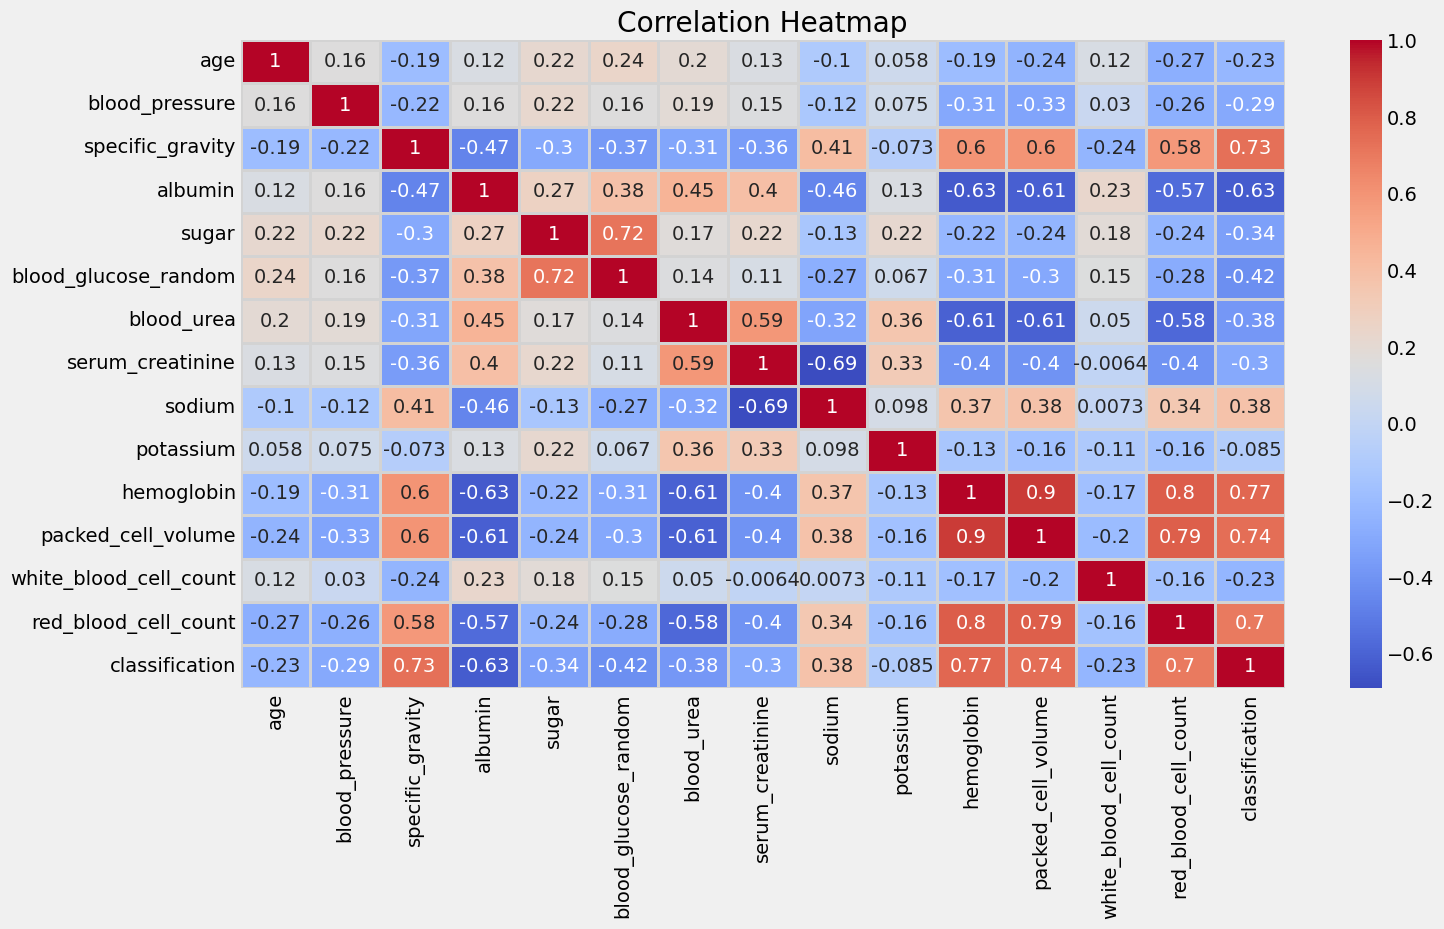

In [139]:
plt.figure(figsize = (15, 8))

# Convert non-numeric columns to numeric
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot = True, linewidths = 2, linecolor = 'lightgrey', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [140]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

# Exploratory Data Analysis (EDA) for Chronic Kidney Disease

In [141]:
# defining functions to create plot

import matplotlib.pyplot as plt

def violin(col):
    plt.figure(figsize=(10,6))
    sns.violinplot(x="classification", y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

def kde(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=df, x=col, hue="classification", shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
def scatter(col1, col2):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=col1, y=col2, hue="classification", data=df)
    plt.title(f'Relationship between {col1} and {col2}')
    plt.show()



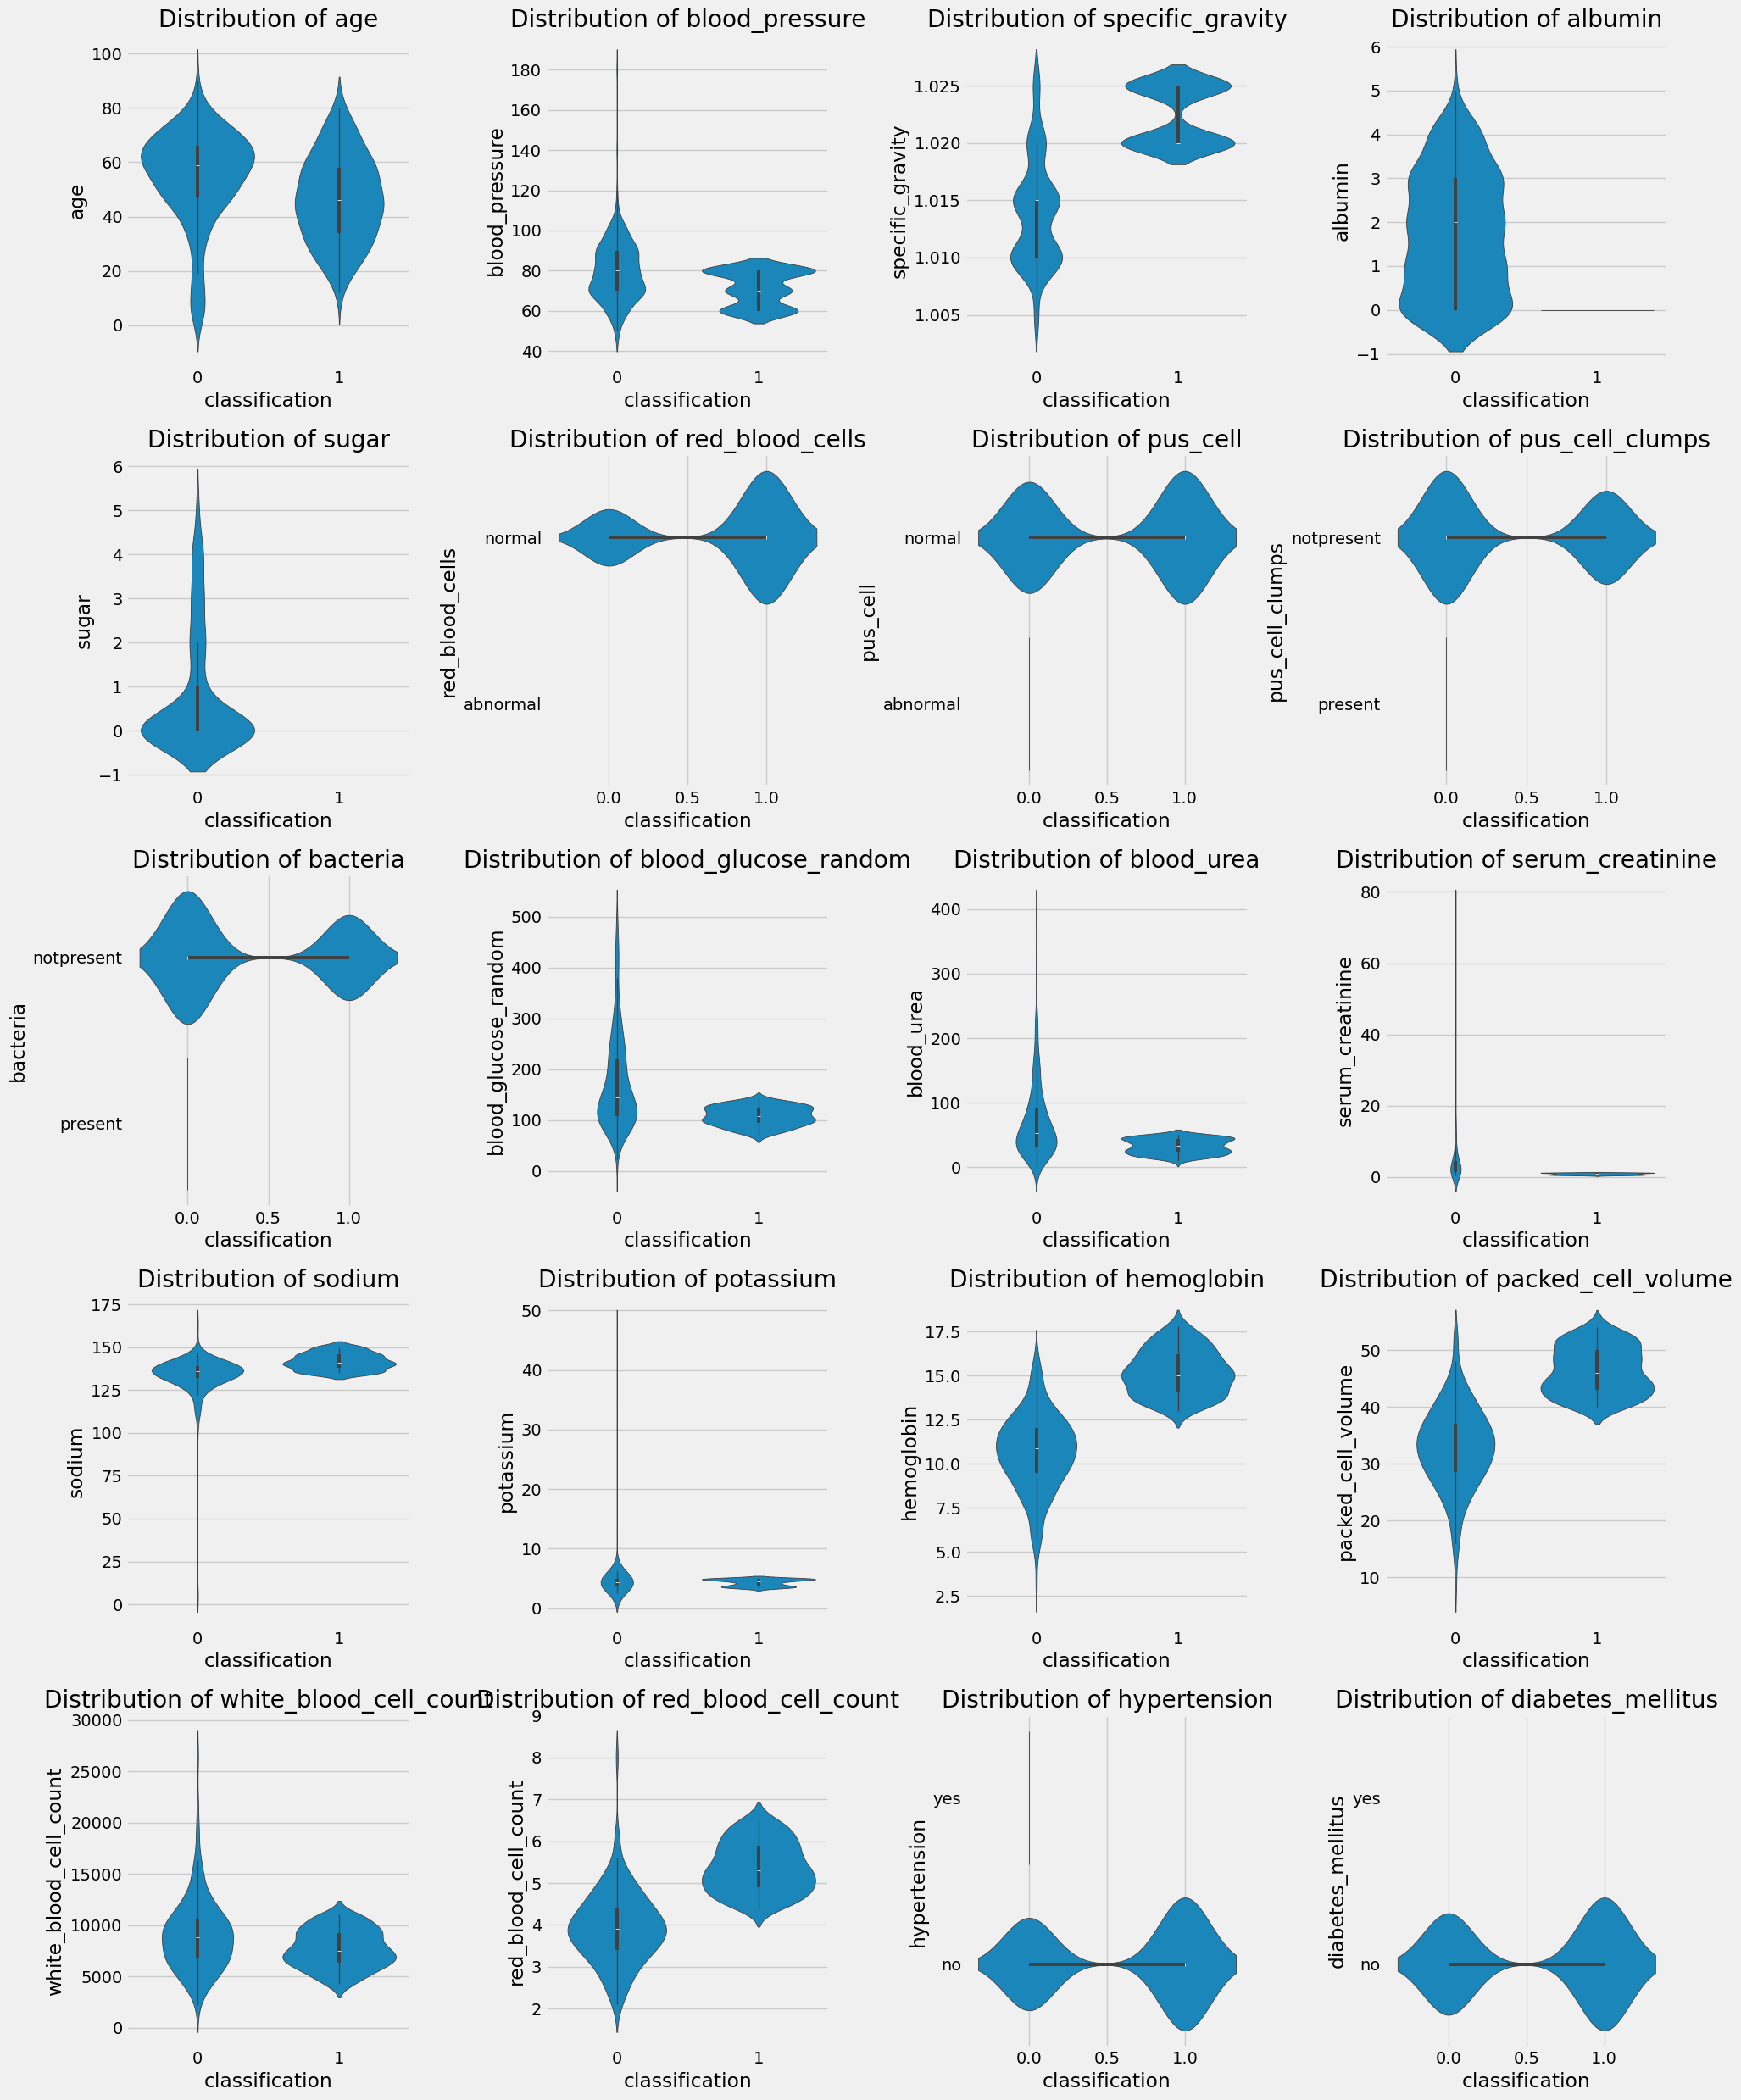

In [142]:
fig, axs = plt.subplots(5, 4, figsize=(20, 25))
for i, col in enumerate(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
                         'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
                         'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
                         'potassium', 'hemoglobin', 'packed_cell_volume',
                         'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
                         'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
                         'pedal_edema', 'anemia', 'classification']):
    if i < 20:  # Adjusted to ensure index does not exceed the size of axs
        sns.violinplot(x="classification", y=col, data=df, ax=axs[i//4, i%4])
        axs[i//4, i%4].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [143]:
def kde(col):
    fig = px.kde(df, x=col, color="classification", title=f'Distribution of {col}')
    fig.show()



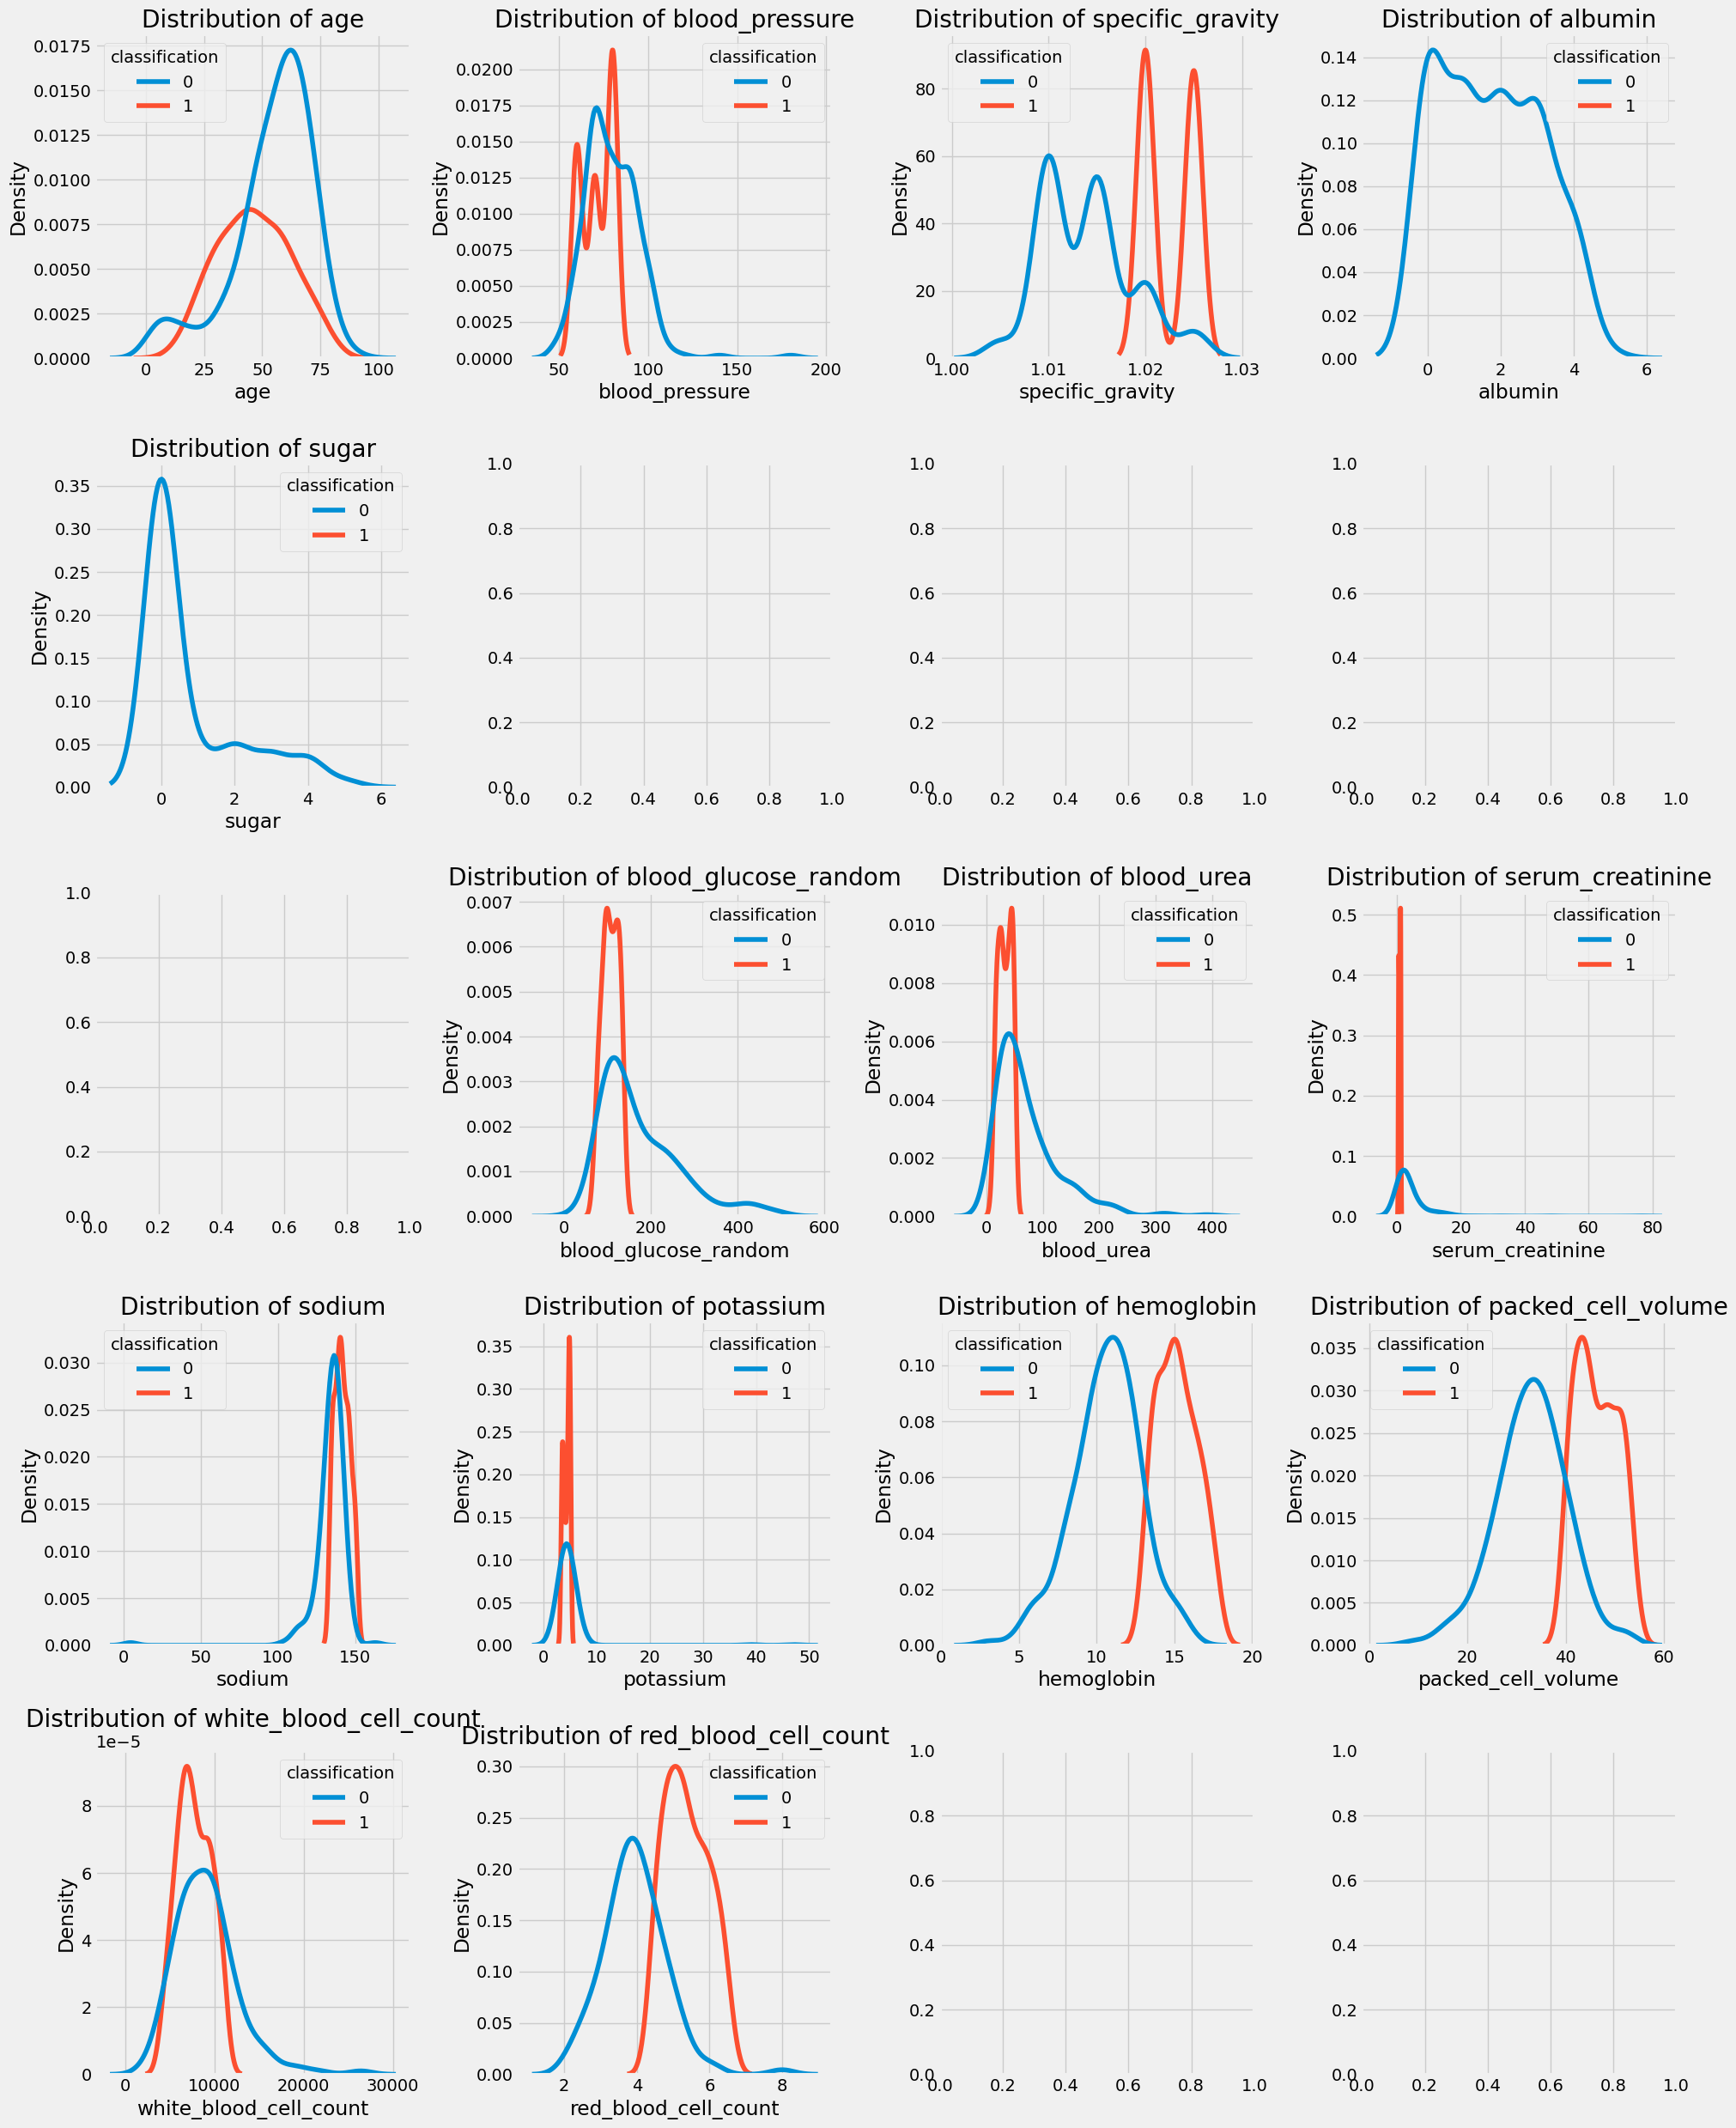

In [144]:
fig, axs = plt.subplots(5, 4, figsize=(20, 25))
for i, col in enumerate(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
                         'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
                         'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
                         'potassium', 'hemoglobin', 'packed_cell_volume',
                         'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
                         'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
                         'pedal_edema', 'anemia']):
    if i < 20:  # Adjusted to ensure index does not exceed the size of axs
        if df[col].dtype.kind in 'bifc':  # Check if column is numeric
            sns.kdeplot(data=df, x=col, hue="classification", ax=axs[i//4, i%4])
            axs[i//4, i%4].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

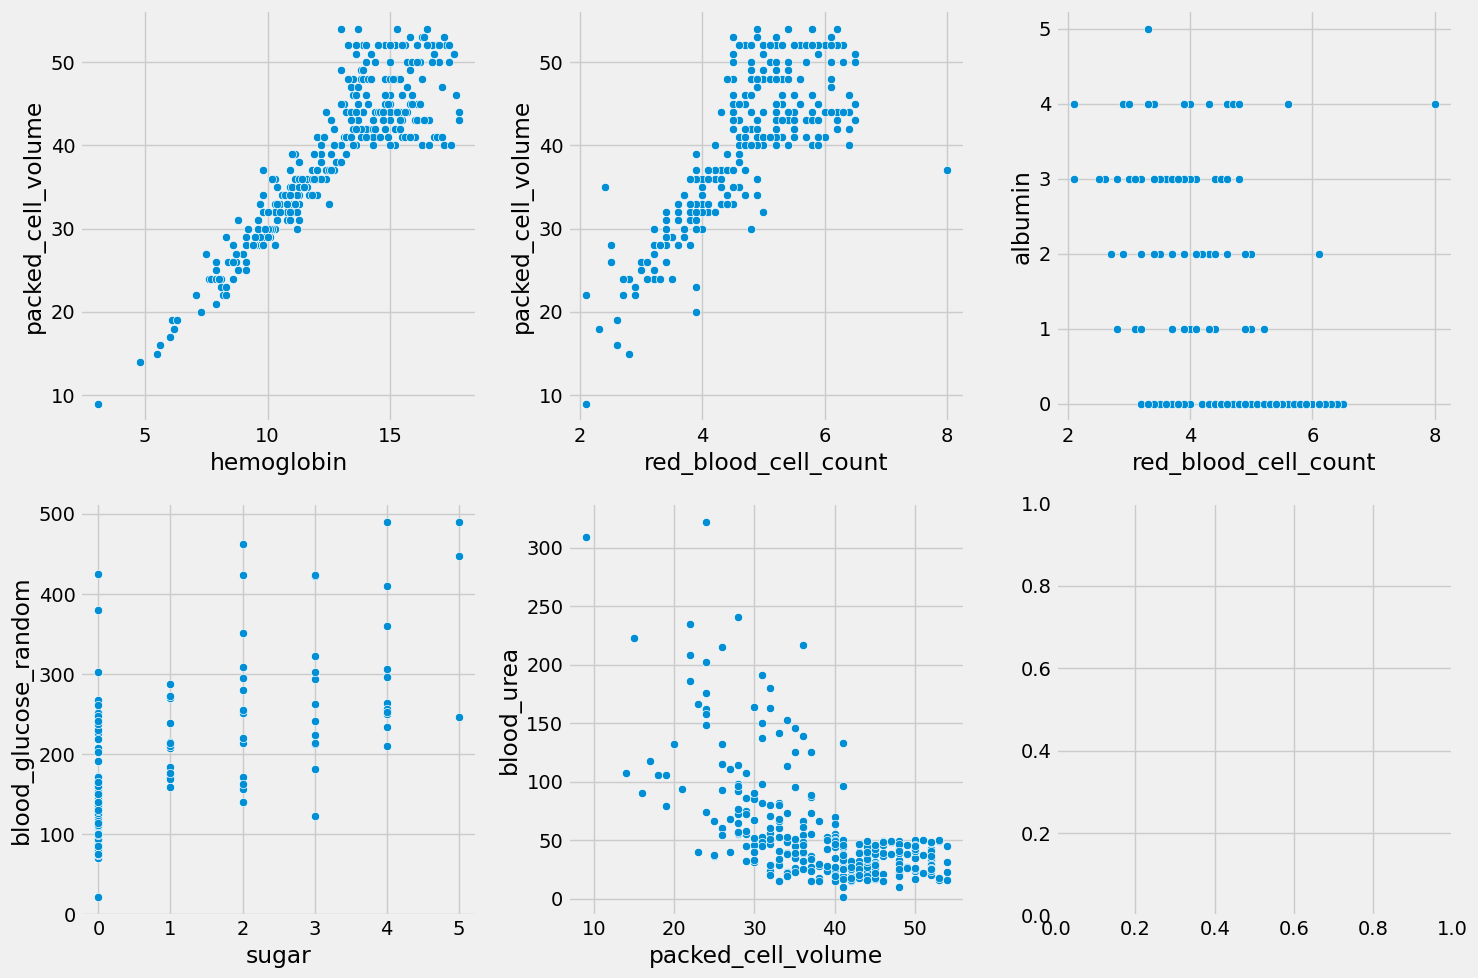

In [145]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.scatterplot(data=df, x='hemoglobin', y='packed_cell_volume', ax=axs[0, 0])
sns.scatterplot(data=df, x='red_blood_cell_count', y='packed_cell_volume', ax=axs[0, 1])
sns.scatterplot(data=df, x='red_blood_cell_count', y='albumin', ax=axs[0, 2])
sns.scatterplot(data=df, x='sugar', y='blood_glucose_random', ax=axs[1, 0])
sns.scatterplot(data=df, x='packed_cell_volume', y='blood_urea', ax=axs[1, 1])
plt.tight_layout()
plt.show()



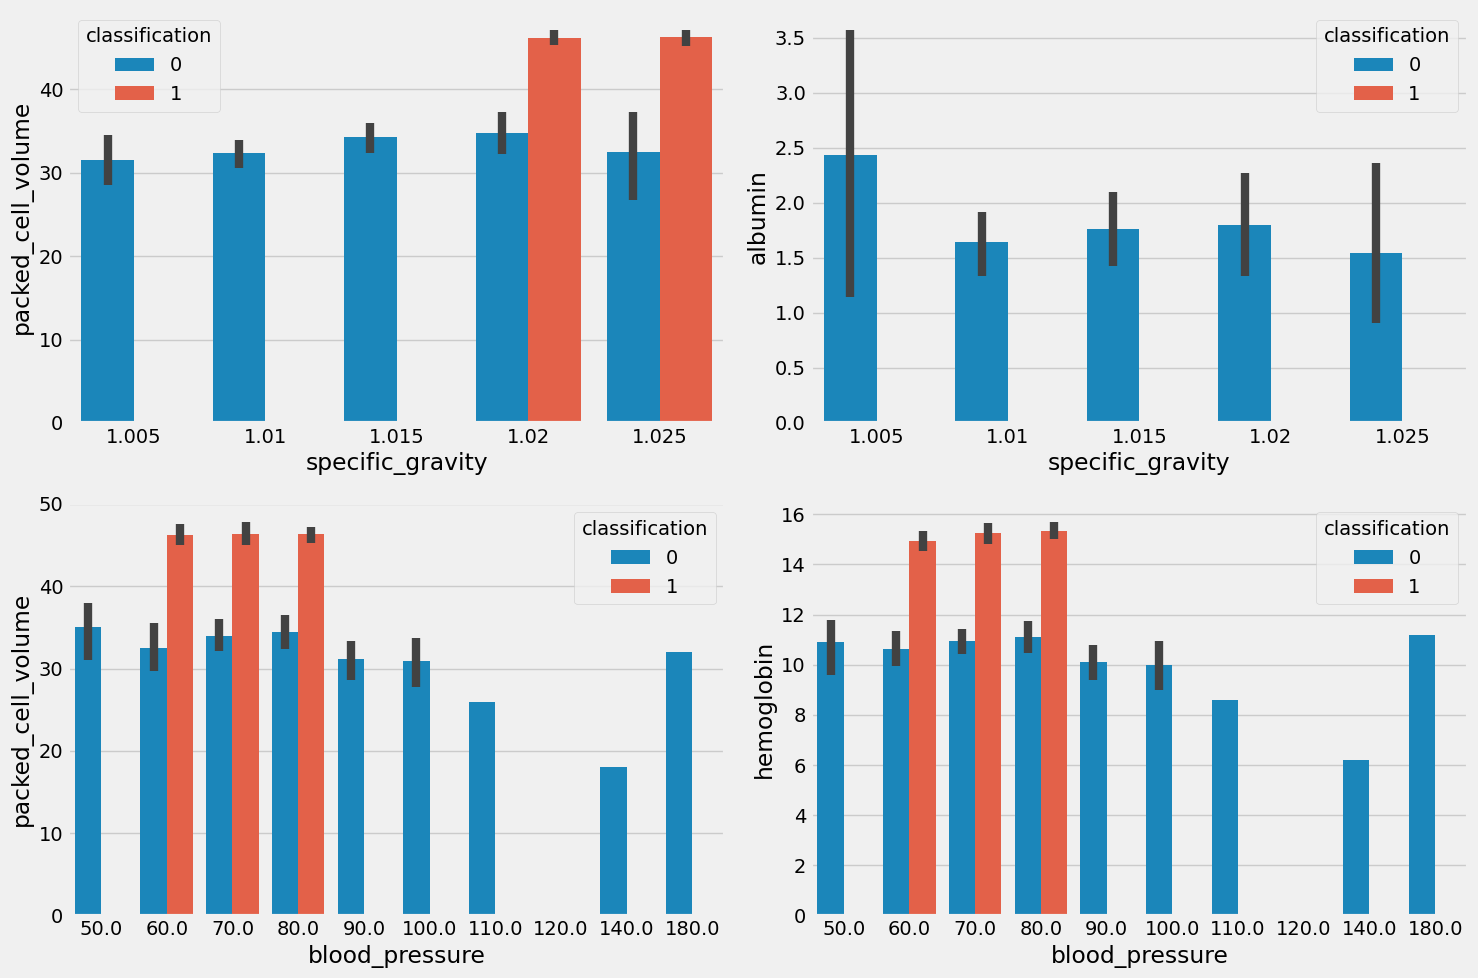

In [146]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(data=df, x="specific_gravity", y="packed_cell_volume", hue="classification", ax=axs[0, 0])
sns.barplot(data=df, x="specific_gravity", y="albumin", hue="classification", ax=axs[0, 1])
sns.barplot(data=df, x="blood_pressure", y="packed_cell_volume", hue="classification", ax=axs[1, 0])
sns.barplot(data=df, x="blood_pressure", y="hemoglobin", hue="classification", ax=axs[1, 1])
plt.tight_layout()
plt.show()

# Data Preprocessing Steps
### 1. Data Cleaning: Handling missing values and outliers
### 2. Data Transformation: Normalization and feature scaling
### 3. Feature Engineering: Extracting relevant features from existing ones
### 4. Data Split: Dividing the dataset into training and testing sets

In [147]:
null_values = df.isnull().sum()
print(null_values)

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64


In [148]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [149]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [150]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [151]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [152]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [153]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [154]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [155]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

Now that all missing values have been handled, let's proceed with encoding categorical features. This step is crucial for machine learning models to understand categorical data.

# Feature Encoding
### This step involves converting categorical variables into numerical variables to prepare the data for modeling.
### We will use techniques such as one-hot encoding, label encoding, or binary encoding depending on the nature of the categorical variables.

In [156]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

classification has 2 categories



Since all categorical columns have only 2 categories, we can effectively use a label encoder to transform these categorical variables into numerical variables. This is a suitable approach as it simplifies the data for modeling purposes and allows the model to understand the categorical data more effectively.

In [157]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [158]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,142.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,144.0,18.0,0.8,150.0,4.2,11.3,38.0,6000.0,4.9,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,135.0,5.0,9.6,31.0,7500.0,5.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,134.0,6.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [159]:
df.describe()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.467500,76.450000,1.017425,1.04750,0.462500,0.810000,0.767500,0.105000,0.055000,148.672500,57.850500,3.068625,137.643750,4.577000,12.487750,39.020000,8412.000000,4.70325,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.129726,13.669845,0.005697,1.36194,1.125505,0.392792,0.422955,0.306937,0.228266,80.140574,50.435946,5.659481,9.793927,2.843358,2.881864,9.051764,2948.030395,1.01671,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.10000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.400000,32.000000,6400.000000,3.90000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.600000,41.000000,8050.000000,4.80000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.250000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,163.500000,66.250000,2.800000,142.000000,4.900000,14.925000,46.000000,9800.000000,5.40000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building
## Decision Tree
#### Theory: Decision Trees are a type of supervised learning algorithm that use a tree-like model to classify data or make predictions. They work by recursively partitioning the data into smaller subsets based on the values of the input features.
#### Implementation: We will use the DecisionTreeClassifier class from scikit-learn to implement the Decision Tree model.

## Random Forest
#### Theory: Random Forests are an ensemble learning method that combines multiple Decision Trees to improve the accuracy and robustness of the model. They work by training multiple Decision Trees on different subsets of the data and then combining their predictions.
#### Implementation: We will use the RandomForestClassifier class from scikit-learn to implement the Random Forest model.

## Logistic Regression
#### Theory: Logistic Regression is a type of supervised learning algorithm that uses a logistic function to model the probability of a binary outcome. It is commonly used for binary classification problems.
#### Implementation: We will use the LogisticRegression class from scikit-learn to implement the Logistic Regression model.

## SVM (Support Vector Machine)
#### Theory: SVMs are a type of supervised learning algorithm that use a kernel function to map the data into a higher-dimensional space, where it can be linearly separated. They are commonly used for classification and regression problems.
#### Implementation: We will use the SVC class from scikit-learn to implement the SVM model.

## Naive Bayes
#### Theory: Naive Bayes is a type of supervised learning algorithm that uses Bayes' theorem to classify data. It assumes that the features are independent and identically distributed.
#### Implementation: We will use the GaussianNB class from scikit-learn to implement the Naive Bayes model.

## KNN
#### Theory: KNN is a type of supervised learning algorithm that uses the k-nearest neighbors to classify data. It works by finding the k most similar data points to a new input and using their labels to make a prediction.
#### Implementation: We will use the KNeighborsClassifier class from scikit-learn to implement the KNN model.

In [160]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
y = df[dep_col]

In [161]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming X_train, y_train, X_test, and y_test are defined elsewhere in the notebook
# If not, please define them before running this code

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))




              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



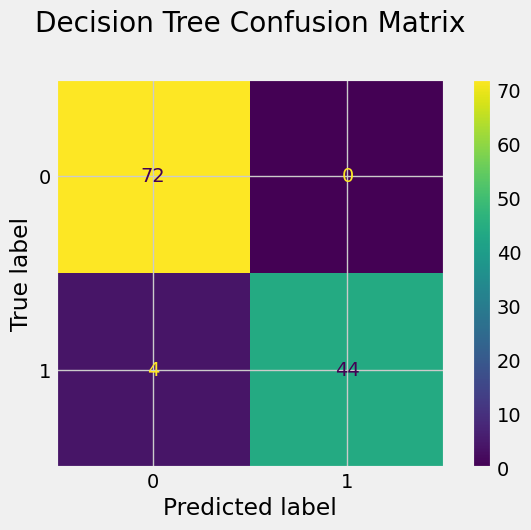

In [168]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, predDT)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Decision Tree Confusion Matrix', y=1.1)
plt.show()



# Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X_train, y_train, X_test, and y_test are defined elsewhere in the notebook
# If not, please define them before running this code

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predRF = clf.predict(X_test)

print(classification_report(y_test, predRF))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



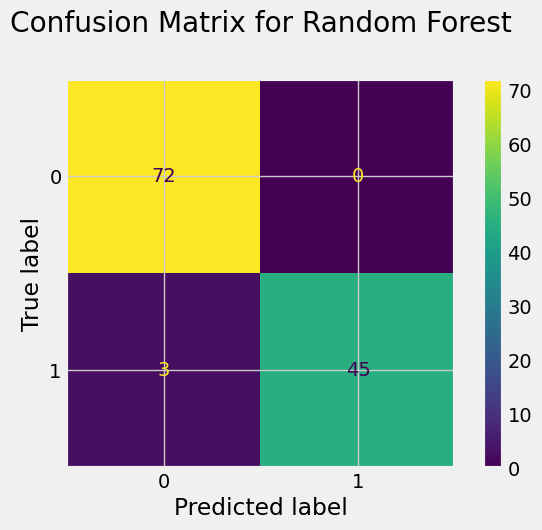

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, predRF)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.show()



# Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming X_train, y_train, X_test, and y_test are defined elsewhere in the notebook
# If not, please define them before running this code

clf = LogisticRegression()
clf.fit(X_train, y_train)
predLR = clf.predict(X_test)

print(classification_report(y_test, predLR))



              precision    recall  f1-score   support

           0       0.89      0.93      0.91        72
           1       0.89      0.83      0.86        48

    accuracy                           0.89       120
   macro avg       0.89      0.88      0.89       120
weighted avg       0.89      0.89      0.89       120



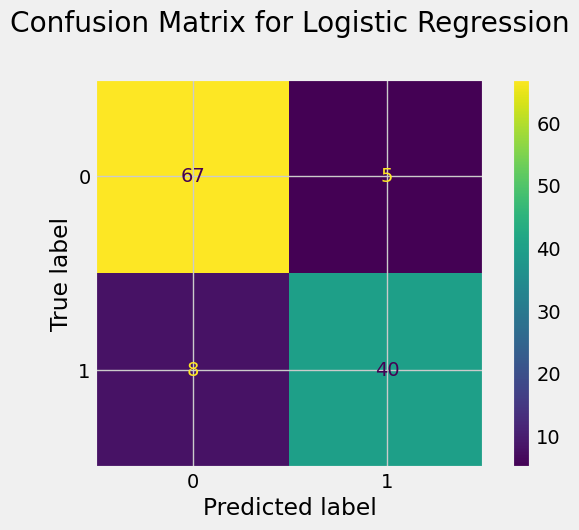

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and predLR are defined elsewhere in the notebook
# If not, please define them before running this code

# Generate confusion matrix
cm = confusion_matrix(y_test, predLR)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.show()

## SVM (Support Vector Machine)

In [169]:
from sklearn.metrics import classification_report
from sklearn import svm

# Assuming X_train, y_train, X_test, and y_test are defined elsewhere in the notebook
# If not, please define them before running this code

clf = svm.SVC()
clf.fit(X_train, y_train)
predSVM = clf.predict(X_test)

print(classification_report(y_test, predSVM))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        72
           1       0.00      0.00      0.00        48

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.38       120
weighted avg       0.36      0.60      0.45       120



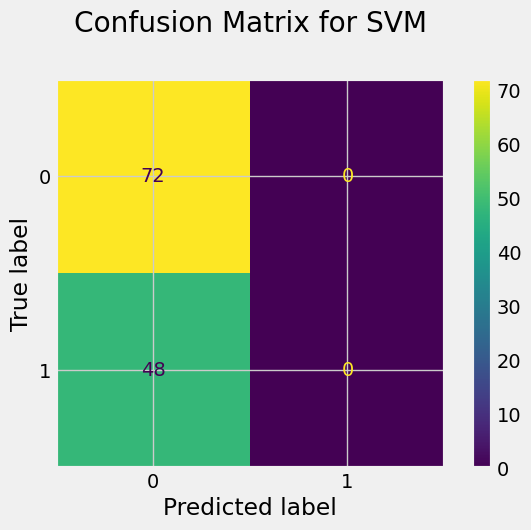

In [171]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and predSVM are defined elsewhere in the notebook
# If not, please define them before running this code

# Generate confusion matrix for SVM
cm_svm = confusion_matrix(y_test, predSVM)

# Plotting the confusion matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()

plt.title('Confusion Matrix for SVM', y=1.1)
plt.show()

## Naive Bayes

In [172]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming X_train, y_train, X_test, and y_test are defined elsewhere in the notebook
# If not, please define them before running this code

# Train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the test set
predNB = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, predNB))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88        72
           1       0.77      0.96      0.85        48

    accuracy                           0.87       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.89      0.87      0.87       120



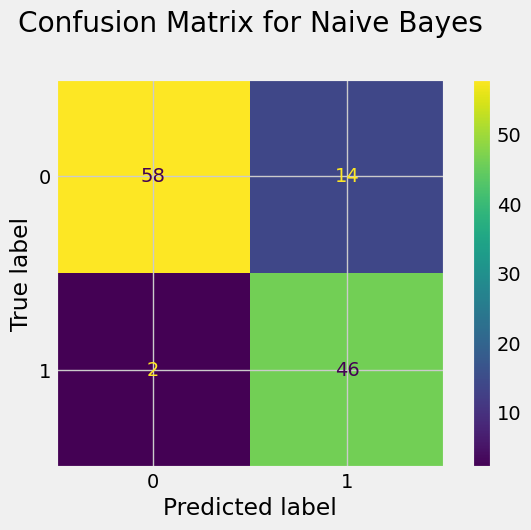

In [173]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and predNB are defined elsewhere in the notebook
# If not, please define them before running this code

# Generate confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, predNB)

# Plotting the confusion matrix for Naive Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()

plt.title('Confusion Matrix for Naive Bayes', y=1.1)
plt.show()

## KNN

In [177]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ks = 10
mean_acc = []
for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc.append(accuracy_score(y_test, yhat))  
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.6416666666666667, 0.725, 0.7, 0.7166666666666667, 0.675, 0.7, 0.6583333333333333, 0.625]


In [180]:
from sklearn.metrics import classification_report

# Assuming y_test and predNB are defined elsewhere in the notebook
# If not, please define them before running this code

# Generate classification report for KNN
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69        72
           1       0.53      0.54      0.54        48

    accuracy                           0.62       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.63      0.62      0.63       120



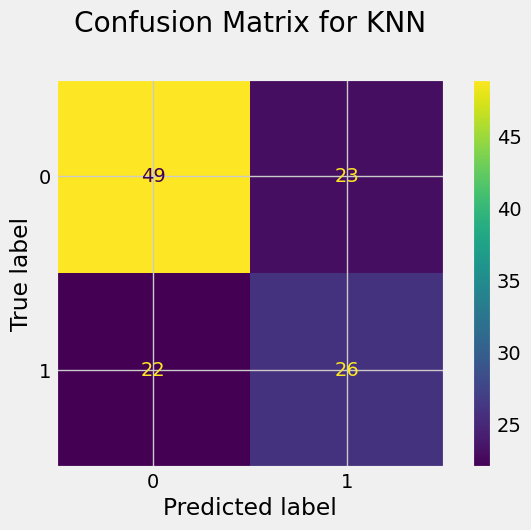

In [181]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and yhat are defined elsewhere in the notebook
# If not, please define them before running this code

# Generate confusion matrix for KNN
cm_knn = confusion_matrix(y_test, yhat)

# Plotting the confusion matrix for KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()

plt.title('Confusion Matrix for KNN', y=1.1)
plt.show()


# Comparision Table

In [188]:
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
        
}
chart = pd.DataFrame(chart)

NameError: name 'predRFC' is not defined

In [185]:
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
        
}
chart = pd.DataFrame(chart)


NameError: name 'predRFC' is not defined

In [184]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
        
}
chart = pd.DataFrame(chart)

NameError: name 'predRFC' is not defined